<a href="https://colab.research.google.com/github/dejuakim/PROJECT_aiffel/blob/master/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # 0부터 월요일

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str)) # 이건 왜 필요했을까??
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [9]:
# 모집단과 표본 집단의 TotalPrice를 비교를 위해 TotalPrice를 모집단으로 설정
population = df['TotalPrice']

In [10]:
# 무작위 표본 추출
sample = population.sample(n=1000, random_state=42)

In [11]:
# 모집단의 평균과 표준편차
pop_mean = population.mean()
pop_std = population.std()

In [12]:
# 표본의 평균과 표준편차
sample_mean = sample.mean()
sample_std = sample.std()

In [13]:
# 결과 출력
print(f"--- 모집단(Population) 통계 ---")
print(f"데이터 개수: {len(population):,}")
print(f"모평균 (Mean): {pop_mean:.2f}")
print(f"모표준편차 (Std): {pop_std:.2f}")

print(f"\n--- 표본(Sample, n=1000) 통계 ---")
print(f"표본평균 (Mean): {sample_mean:.2f}")
print(f"표본표준편차 (Std): {sample_std:.2f}")

--- 모집단(Population) 통계 ---
데이터 개수: 541,909
모평균 (Mean): 17.99
모표준편차 (Std): 378.81

--- 표본(Sample, n=1000) 통계 ---
표본평균 (Mean): 16.83
표본표준편차 (Std): 64.47


In [14]:
# 차이 비교
print(f"--- 차이(Difference) ---")
print(f"평균 차이: {abs(pop_mean - sample_mean):.2f}")
print(f"표준편차 차이: {abs(pop_std - sample_std):.2f}")

--- 차이(Difference) ---
평균 차이: 1.16
표준편차 차이: 314.34


In [ ]:
# 중심극한정리를 사용해 모집단과 표본의 차이를 설명
'''
모평균과 표본평균의 차이가 1.16으로 매우 작게 나타났습니다.
이는 중심극한정리에 따라 모집단의 분포가 불규칙하더라도
표본의 크기가 1,000개로 충분히 크기 때문에 표본평균이 모평균에
안정적으로 수렴했음을 보여줍니다. 즉, 1000개의 샘플만으로도 50만 개의
데이터가 가지는 평균적인 경향을 잘 설명합니다.
'''

# 표준편차의 차이 설명
'''
반면에 표준편차의 차이는 314.34 로 다소 크게 나타났습니다.
이는 전처리를 하지 않아 모집단에 포함된 극단적인 이상치가 무작위로 추출된
표본에는 포함되지 않았거나 비율이 달라진 것으로 보입니다.
표준편차는 이상치에 매우 민감하게 반응하기 때문에
모집단 분포 특성이 표본에 완벽하게 반영되지 않았음을 알 수 있습니다.
'''

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [18]:
# 주문이 가장 많은 상위 두 국가 찾기
top_countries = df['Country'].value_counts().head(2)
print(f"주문이 가장 많은 상위 두 국가: {top_countries}")

주문이 가장 많은 상위 두 국가: Country
United Kingdom    495478
Germany             9495
Name: count, dtype: int64


In [19]:
# 국가 이름만 뽑아내기 (인덱스 활용)
first_country = top_countries.index[0]  # 1등 국가
second_country = top_countries.index[1] # 2등 국가

In [22]:
# 두 나라의 TotalPrice 데이터 구분
first_group = df[df['Country'] == first_country]['TotalPrice']
second_group = df[df['Country'] == second_country]['TotalPrice']

In [26]:
# SciPy 라이브러리 사용하여 독립표본 t-검정 실행
from scipy import stats

t_stat, p_val = stats.ttest_ind(first_group, second_group, equal_var=False)

In [30]:
print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_val:.4f}")

t-통계량: -10.0464
p-값: 0.0000


In [ ]:
# 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.
'''
통계적 유의성 검정
독립표본 t-검정을 통해 두 국가의 'TotalPrice'평균 차이를 검증했습니다.
[가설설정]
- 귀무가설: 두 국가의 평균 주문 금액에 차이가 없다.
- 대립가설: 두 국가의 평균 주문 금액에 차이가 있다.
[검정결과]
- 분석 결과 p-값이 0.0000 으로 유의수준 0.05보다 작게 나타났습니다.
- 따라서 귀무가설을 기각하고 통계적으로 두 국가의 평균 주문 금액에는 유의미한 차이가 있다고 결론 내립니다.
'''

In [ ]:
# t-통계량과 p-값을 해석하여 결과를 설명하고
'''
t-통계량: -10.0464
>> 두 집단 간의 평균 차이가 표준오차 대비 약 10배나 크다는 것을 의미합니다.
   t-통계량의 절댓값이 2 이상이면 차이가 있다고 보는데
   10.0464라는 수치는 두 집단간의 매우 강력한 차이가 존재함을 보여줍니다.
p-값: 0.0000
>> 이 값은 유의수준 0.05보다 현저히 작습니다,
   우연히 이 정도의 차이가 관찰될 확률이 사실상 0% 임을 의미합니다.
   따라서 두 국가의 평균 주문 금액에는 통계적으로 매우 유의미한 차이가 있다고 볼 수 있습니다.
'''
#  1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.
'''
[1종 오류]
실제로는 두 국가의 평균 주문 금액에 차이가 없는데
분석 결과만 보고 차이가 있다고 잘못 결론을 내리는 오류
>> p-값이 매우 작아 차이가 있다고 결론을 내렸으나 우리가 뽑은 표본이
   우연히 특이해서 달랐다면 우리는 제 1종 오류를 범하게 됩니다.
   하지만 p-값이 0.0000이므로 이 오류를 범했을 확률은 희박합니다.
[2종 오류]
실제로는 두 국가의 평균 주문 금액에 차이가 있는데
분석 결과가 모호해서 차이가 없다고 잘못 결론을 내리는 오류
>> 차이가 없다는 결론을 내렸다면 이 오류를 걱정해야 하지만
   명확하게 차이가 있다고 결론을 내렸으므로 제 2종 오류를 범할 가능성은 없습니다.
'''

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [67]:
# 주중(0~4)과 주말(5~6) 데이터 나누기
weekday_prices = df[df['DayOfWeek'] < 5]['TotalPrice']
weekend_prices = df[df['DayOfWeek'] >= 5]['TotalPrice']

In [68]:
# 주중 통계량
weekday_stats = weekday_prices.describe()
weekday_stats['variance'] = weekday_prices.var()

In [69]:
# 주말 통계량
weekend_stats = weekend_prices.describe()
weekend_stats['variance'] = weekend_prices.var()

In [70]:
week_stats = pd.concat([weekday_stats, weekend_stats], axis=1)
week_stats.columns = ['주중(weekday)', '주말(weekend)']

In [71]:
week_stats

,주중(weekday),주말(weekend)
count,477534.000000,64375.000000
mean,18.725513,12.515400
std,403.380620,30.044303
min,-168469.600000,-434.510000
25%,3.750000,2.950000
50%,9.950000,6.300000
75%,17.700000,15.000000
max,168469.600000,2365.200000
variance,162715.924394,902.660147


In [72]:
# 보고 싶은 행만 고르기
table_index =['mean', '50%', 'std', 'variance','25%', '75%', 'max']

In [73]:
# 이름 변경하기
name_change = {
    'mean': '평균',
    '50%': '중간값',
    'std': '표준편차',
    'variance': '분산',
    '25%': '1분위수',
    '75%': '3분위수',
    'max': '최댓값'
}

In [74]:
final_table = week_stats.loc[table_index].rename(index=name_change).round(2)

In [75]:
final_table

,주중(weekday),주말(weekend)
평균,18.73,12.52
중간값,9.95,6.30
표준편차,403.38,30.04
분산,162715.92,902.66
1분위수,3.75,2.95
3분위수,17.70,15.00
최댓값,168469.60,2365.20


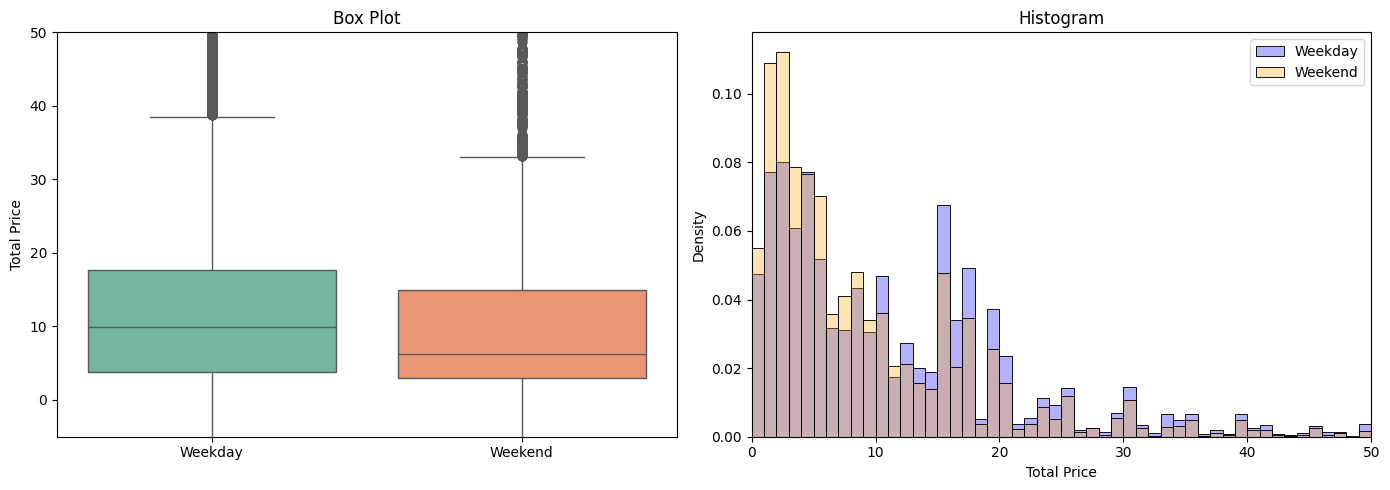

In [86]:
plt.figure(figsize=(14, 5))

# 첫 번째 그래프: 상자수염그림 (Box Plot)
plt.subplot(1, 2, 1)

sns.boxplot(data=[weekday_prices.values, weekend_prices.values], palette='Set2')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title('Box Plot')

# Y축을 확대
plt.ylim(-5, 50)
plt.ylabel('Total Price')

# 두 번째 그래프: 히스토그램 (Histogram)
plt.subplot(1, 2, 2)

sns.histplot(weekday_prices, label='Weekday', color='blue', alpha=0.3,
             bins=50, stat='density', common_norm=False, # stat='density' >> 개수 차이가 크기때문에 개수가 아니라 비율로 그리기
             binrange=(0, 50))
sns.histplot(weekend_prices, label='Weekend', color='orange', alpha=0.3,
             bins=50, stat='density', common_norm=False,  # common_norm=False >> 100% 기준으로 따로따로 계산
             binrange=(0, 50))
# X축을 확대
plt.xlim(0, 50)

plt.title('Histogram')
plt.xlabel('Total Price')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 상자수염그림 (Box Plot) 분석
'''
상자 가운데에 있는 가로선을 보면 주중(Weekday)의 중간값이 주말(Weekend)보다 더 위쪽에 있습니다.
- 주중에는 주말보다 상대적으로 지출하는 금액이 큽니다.
- 주중에 비싼 물건을 사거나 대량 구매하는 경향이 더 강하게 보입니다.

상자의 높이(위아래의 길이)를 보면 주중이 주말보다 좀 더 길쭉합니다.
- 주중 구매 금액은 소액부터 고액까지 아주 다양하게 나타납니다.
- 주말은 주중보다 소액 결제가 더 많은 것을 알 수 있습니다.

상자 위쪽으로 점들이 수없이 찍혀있습니다,
- 평균적인 주문 범위를 뛰어넘는 고액 주문이 주중과 주말 모두 존재합니다.
- 도매나 대량 구매 건일 수 있습니다.
'''

In [ ]:
# 히스토그램 (Histogram) 분석
'''
두 그래프 모두 왼쪽이 가장 높고 오른쪽으로 갈수록 급격히 낮아지는 모양입니다. >> 우편향 분포
- 데이터가 오른쪽으로 꼬리가 긴 모양을 하고 있습니다.
- 대부분의 주문이 소액 결제임을 알 수 있습니다.

초저가 주문인 0~5구간은 주황색 선(주말)이 파란색 선(주중)보다 더 높습니다.
- 주말에는 소액 주문의 비중이 압도적으로 높습니다.

중간 가격의 주문인 10~20구간은 파란색 선(주중)이 주황색 선(주말)보다 더 높고 넓게 퍼져 있습니다.
- 주중에는 10-20 정도의 중규모 주문이 주말보다 훨씬 더 자주 일어납니다.
'''

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [110]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [171]:
# 필요한 컬럼만 골라서 새로운 데이터프레임 만들기
target_cols = ['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
df_reg = df[target_cols].copy()

In [172]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      541909 non-null  int64  
 1   UnitPrice     541909 non-null  float64
 2   Country       541909 non-null  object 
 3   DayOfWeek     541909 non-null  int32  
 4   InvoiceMonth  541909 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 16.5+ MB


In [173]:
df_reg.describe()

,Quantity,UnitPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,2.431277,7.553128
std,218.081158,96.759853,1.844709,3.509055
min,-80995.000000,-11062.060000,0.000000,1.000000
25%,1.000000,1.250000,1.000000,5.000000
50%,3.000000,2.080000,2.000000,8.000000
75%,10.000000,4.130000,4.000000,11.000000
max,80995.000000,38970.000000,6.000000,12.000000


In [174]:
# Quantity(수량)와 UnitPrice(단가)가 0보다 큰 정상 거래만 남기기
df_reg = df_reg[(df_reg['Quantity'] > 0) & (df_reg['UnitPrice'] > 0)]

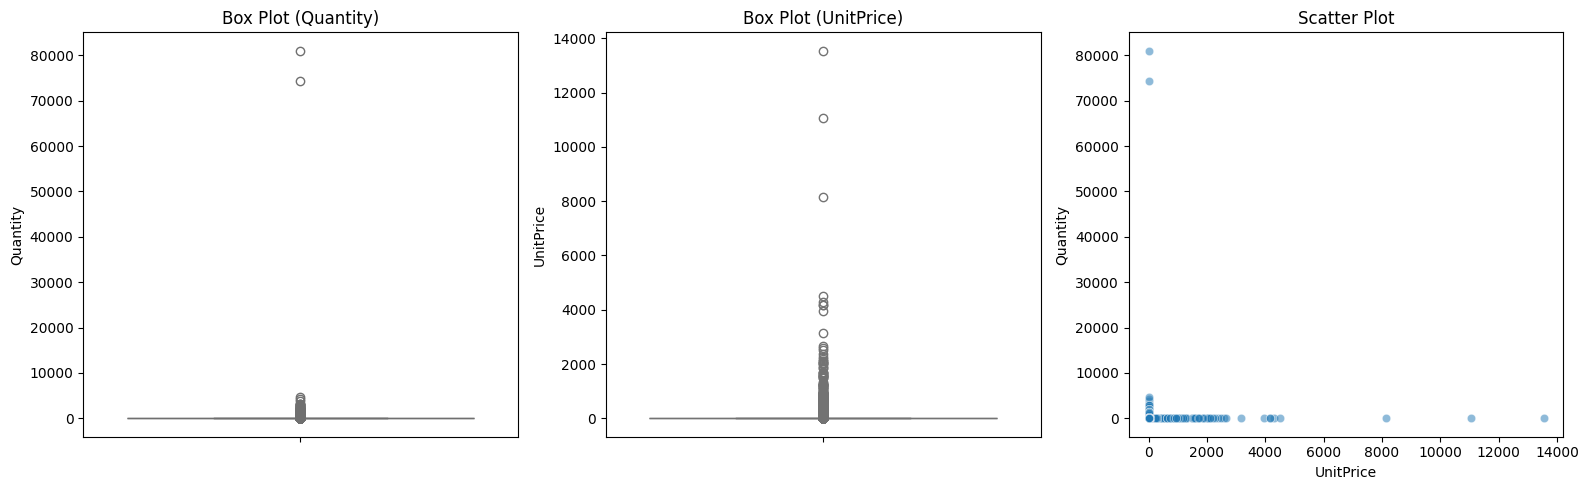

In [175]:
plt.figure(figsize=(16, 5))

# 상자수염그림 (Box Plot)- 수량(Quantity)
plt.subplot(1, 3, 1)
sns.boxplot(y=df_reg['Quantity'], color='skyblue')
plt.title('Box Plot (Quantity)')

# 상자수염그림 (Box Plot) - 단가(UnitPrice)
plt.subplot(1, 3, 2)
sns.boxplot(y=df_reg['UnitPrice'], color='lightgreen')
plt.title('Box Plot (UnitPrice)')

# 3. 산점도 (Scatter Plot)
plt.subplot(1, 3, 3)
sns.scatterplot(x='UnitPrice', y='Quantity', data=df_reg, alpha=0.5)
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

In [176]:
# Quantity(수량) 이상치 제거
q_99_quantity = df_reg['Quantity'].quantile(0.99) # 상위 1% 수량 찾기
df_reg = df_reg[df_reg['Quantity'] < q_99_quantity]

# UnitPrice(단가) 이상치 제거
q_99_price = df_reg['UnitPrice'].quantile(0.99) # 상위 1% 가격 찾기
df_reg = df_reg[df_reg['UnitPrice'] < q_99_price]

In [177]:
df_reg.describe()

,Quantity,UnitPrice,DayOfWeek,InvoiceMonth
count,518118.000000,518118.000000,518118.000000,518118.000000
mean,7.679046,3.111922,2.443108,7.565267
std,11.392435,2.935898,1.855981,3.508787
min,1.000000,0.001000,0.000000,1.000000
25%,1.000000,1.250000,1.000000,5.000000
50%,3.000000,2.080000,2.000000,8.000000
75%,10.000000,4.130000,4.000000,11.000000
max,99.000000,16.950000,6.000000,12.000000


In [178]:
# 범주형 데이터 인코딩하기
df_reg = pd.get_dummies(df_reg, columns=['Country'], drop_first=True)

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [180]:
# 문제(X)와 정답(y) 나누기
# 종속변수: 판매 수량(Quantity)
# 독립변수: 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월( InvoiceMonth)
X = df_reg.drop('Quantity', axis=1)
y = df_reg['Quantity']

In [181]:
# 학습용(Train)과 테스트용(Test) 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [183]:
# 예측 및 평가
y_pred = model.predict(X_test)

### 회귀 분석 결과 ###
----------------------------------------
결정계수 (R²): 0.12
   -> 해석: 이 모델은 판매 수량 변동의 약 12.26%를 설명합니다.
----------------------------------------


,Feature,Coefficient
0,UnitPrice,-1.009437
1,DayOfWeek,-0.122903
2,InvoiceMonth,-0.028608
3,Country_Austria,-17.526779
4,Country_Bahrain,-7.443143
5,Country_Belgium,-16.893938
6,Country_Brazil,-16.670620
7,Country_Canada,-16.059027
8,Country_Channel Islands,-16.178645
9,Country_Cyprus,-18.229958


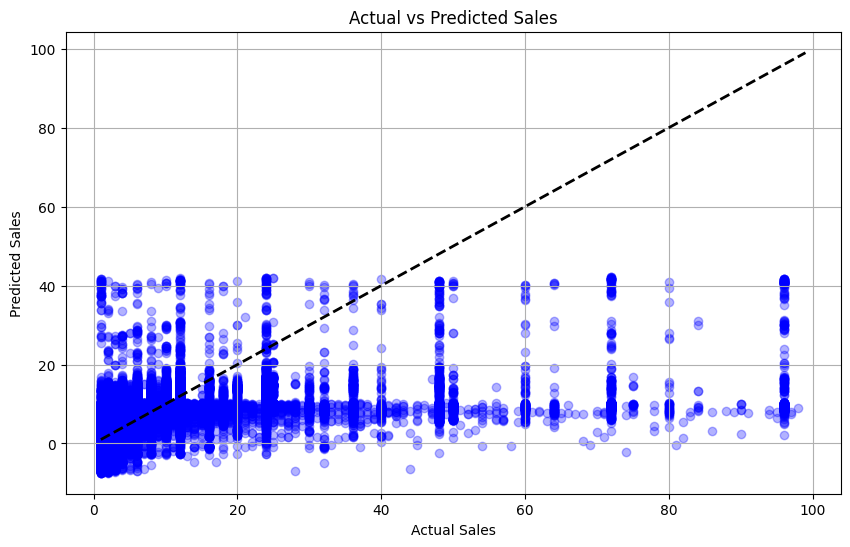

In [192]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("### 회귀 분석 결과 ###")
print("-" * 40)
print(f"결정계수 (R²): {r2:.2f}")
print(f"   -> 해석: 이 모델은 판매 수량 변동의 약 {r2*100:.2f}%를 설명합니다.")
print("-" * 40)

# 회귀 계수 출력
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

display(coefficients)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

In [ ]:
# 회귀계수와 결정계수를 활용한 회귀 분석 결과 해석
'''
결정계수(R-squared)
- 우리 모델이 현실을 얼마나 잘 설명하는가?
- 1에 가까울수록 완벽함(0-1)
>> 결정계수가 0.12로 이 모델은 판매 수량 변화의 약 12.26%를 설명할 수 있습니다.
   실제 고객들이 얼마나 많이 구매할지를 4가지 정보만으로 추측하기는 어렵습니다.
   12%의 설명력을 가진다는 것은 어느 정도의 판매 경향은 파악했다고 볼 수 있습니다.

회귀계수(Coefficient)
- 변수가 1단위 증가할 때 판매량은 몇개나 변하는지를 알려줍니다.
>> UnitPrice의 회귀계수는 약 -1.01이 나왔습니다. 이는 가격이 1달러 비싸지면 판매 수량이 약 1개 줄어든다는 의미입니다.
   비싸면 판매수량이 줄어든다는 것을 데이터로 확인 할 수 있습니다.
>> DayOfWeek의 회귀계수는 약 -0.12입니다. 이는 요일 숫자가 커질수록 판매 수량이 평균 0.12개씩 감소한다고 볼 수 있습니다.
   하지만 수치가 매우 작아서 요일에 따른 판매량 차이는 크지 않다고 해석할 수 있습니다.
>> InvoiceMonth의 회귀계수는 약 -0.03입니다,월 숫자가 커질수록 판매수량은 평균 0.03개씩 감소합니다.
   이 수치는 통계적으로 거의 영향이 없다고 볼 수 있을 것 같습니다.
>> Country는 원핫인코딩을 했기 때문에 해석이 달라집니다.
   drop_first=True 옵션을 썼기 때문에, 알파벳순으로 가장 앞에 있는 국가(아마도 Australia)가 기준 국가입니다,
   Austria의 회귀계수는 약 -17.52입니다. 오스트리아에서의 주문은 기준 국가에 비해 평균 17.5개 더 적게 주문합니다.
   계수가 큰 음수(-)가 많이 나왔다는 것은 기준이 된 국가의 구매 수량이 다른 국가들에 비해 크다는 것을 알 수 있습니다.
'''

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [195]:
# 원본 데이터 복사
df_logi = df.copy()

In [197]:
# 결측치와 가격 이상치 제거
# 반품 데이터가 필요하므로 음수 유지 필요함
# UnitPrice가 0원 이하이거나, 10,000달러 이상인 데이터만 삭제
df_logi = df_logi[(df_logi['UnitPrice'] > 0) & (df_logi['UnitPrice'] < 10000)]

In [205]:
# Quantity 피쳐를 활용해 IsReturn 피쳐를 생성
# Quantity가 0보다 작으면 1(반품), 아니면 0(정상)
df_logi['IsReturn'] = df_logi['Quantity'].apply(lambda x: 1 if x < 0 else 0)

/tmp/ipython-input-2556655172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logi['IsReturn'] = df_logi['Quantity'].apply(lambda x: 1 if x < 0 else 0)


In [206]:
# 반품 비율 확인
print("반품 비율(0:정상, 1:반품)")
print(df_logi['IsReturn'].value_counts(normalize=True))

반품 비율(0:정상, 1:반품)
IsReturn
0    0.982795
1    0.017205
Name: proportion, dtype: float64


In [208]:
# 모델 학습에 사용할 적절한 피쳐 선정 이전 파생 변수 생성
# 고객의 반품률 계산
customer_stats = df_logi.groupby('CustomerID')['IsReturn'].agg(['count', 'mean'])
customer_stats.columns = ['TotalOrders', 'ReturnRate']

In [210]:
# 원래 데이터에 ReturnRate 컬럼 붙이기
df_logi = df_logi.merge(customer_stats['ReturnRate'], left_on='CustomerID', right_index=True, how='left')

In [212]:
df_logi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539382 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     539382 non-null  object        
 1   StockCode     539382 non-null  object        
 2   Description   539382 non-null  object        
 3   Quantity      539382 non-null  int64         
 4   InvoiceDate   539382 non-null  datetime64[ns]
 5   UnitPrice     539382 non-null  float64       
 6   CustomerID    406788 non-null  float64       
 7   Country       539382 non-null  object        
 8   TotalPrice    539382 non-null  float64       
 9   DayOfWeek     539382 non-null  int32         
 10  InvoiceMonth  539382 non-null  int32         
 11  IsReturn      539382 non-null  int64         
 12  ReturnRate    406788 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(2), object(4)
memory usage: 53.5+ MB


In [213]:
# CustomerID가 없는 경우 있음 >> ReturnRate 0으로 채우기
df_logi['ReturnRate'] = df_logi['ReturnRate'].fillna(0)

In [214]:
# 모델 학습을 위한 피쳐 선정
features = ['UnitPrice', 'Country', 'ReturnRate']

In [215]:
X = df_logi[features]
y = df_logi['IsReturn']

In [216]:
# 원-핫 인코딩
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

In [217]:
# 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [218]:
# IsReturn을 예측하는 로지스틱 회귀 모델 학습
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [219]:
# 결과 확인
y_pred = log_model.predict(X_test)

### 로지스틱 회귀 분석 결과 ###

혼동 행렬 (Confusion Matrix)


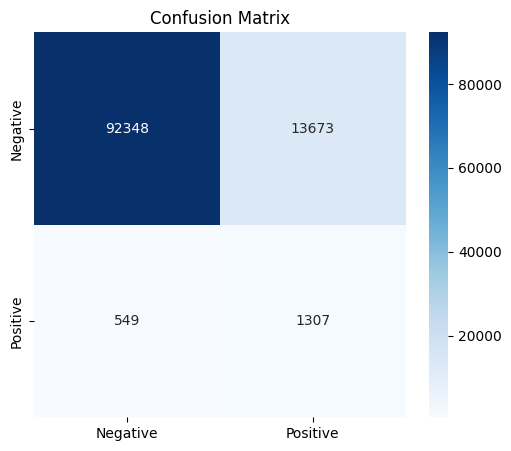


상세 성능 지표 (Classification Report)
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    106021
           1       0.09      0.70      0.16      1856

    accuracy                           0.87    107877
   macro avg       0.54      0.79      0.54    107877
weighted avg       0.98      0.87      0.92    107877



In [225]:
# 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가
print("### 로지스틱 회귀 분석 결과 ###")
print("\n혼동 행렬 (Confusion Matrix)")
# 시각화로 보기 좋게 출력
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
# 0(정상) = Negative, 1(반품) = Positive
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.show()

print("\n상세 성능 지표 (Classification Report)")
print(classification_report(y_test, y_pred))

In [ ]:
# 결과 해석
'''
혼동 행렬(Confusion Matrix) 분석
- 반품(Positive)을 잡아내는 데에 초점을 맞추어 학습되었습니다.
- True(T) / False(F): 모델이 정답을 맞췄느지(T) 틀렸는지(F)
- Positive(P) / Negative(N): 모델이 반품(P)이라고 했는지 정상(N)이라고 했는지
  TN (92,348): 정상 거래의 대부분을 정상이라고 맞췄습니다.
  TP (1,307): 실제 반품된 1,856건 중 1,307건을 놓치지 않고 예측해냈습니다.
  FN (549): 실제로는 반품되었지만 모델이 정상이라고 잘못 판단한 경우입니다.
  FP (13,673): 실제로는 정상인데 모델이 "반품될 것 같다"고 과민 반응한 경우입니다.
평가지표 해석
- 재현율(Recall) >> 0.70
  실제 반품 건수 중 70%를 찾아냈습니다.
  반품 예측 모델의 핵심은 반품을 놓치지 않는 것입니다.
- 정밀도(Precision) >> 0.09
  모델이 "반품이야!"라고 예측한 것 중 실제 반품은 9%에 불과했습니다.
  이는 반품을 놓치지 않으려다 보니, 조금만 의심스러워도 전부 반품으로 예측했기 때문입니다.
- F1-Score >> 0.16
  정밀도가 낮아서 F1 점수도 낮게 나왔습니다.

본 로지스틱 회귀 모델은 약 70%의 재현율로 반품 징후가 있는 거래를 탐지해냈습니다.
다만 반품 탐지율을 높이는 과정에서 정상 거래를 반품으로 오인하는 비율이 높아져
정밀도는 다소 낮게 나타났습니다.
'''

In [ ]:
# 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보기
'''
본 모델은 단가와 국가 변수에 파생변수인 고객별 반품률을 추가 활용하여 학습되었습니다.
그럼에도 불구하고 반품 데이터가 워낙 적다보니 조금이라도 반품할 낌새가 보이면
무조건 반품이라고 예측한 것으로 보입니다.

추가로 모델의 성능을 높이기 위한 방법은 다음과 같이 생각해볼 수 있습니다.

첫째, 상품 반품률을 고객 기준이 아닌 물품을 기준으로 변경합니다.
특정 상품 자체가 불량이 많거나 반품이 잦을 수 있습니다.
고객 반품률과 동일한 방식으로 상품별 반품 확률을 계산하여 변수를 추가한다면
물건의 특성을 반영해 정밀도를 높일 수 있을 것 같습니다.

둘째, 선형모델이 아닌 비선형 모델을 도입합니다.
선형모델은 변수들간의 복잡한 상호작용을 구분하기 어려울 수 있습니다.
따라서 트리 기반의 비선형 모델을 사용한다면 성능을 개선할 수 있을 것으로 보입니다.
'''